<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>EDA: Algerian Forest Fire Dataset</title>
  <style>
    body {
      font-family: Arial, sans-serif;
      background-color: #f4f6f8;
      margin: 40px;
    }
    h1 {
      color: #2c3e50;
      text-align: center;
    }
    p {
      font-size: 18px;
      line-height: 1.6;
      color: #333;
    }
    section {
      background: white;
      padding: 20px;
      margin: 30px auto;
      max-width: 800px;
      border-radius: 10px;
      box-shadow: 0 0 10px rgba(0,0,0,0.1);
    }
    h2 {
      color: #1a5276;
    }
  </style>
</head>
<body>

  <h1>Exploratory Data Analysis (EDA)<br>Algerian Forest Fire Dataset</h1>

  <section>
    <h2>Introduction</h2>
    <p>
      This EDA provides insights into the Algerian Forest Fire Dataset, which contains meteorological and fire occurrence data from two regions in Algeria: Bejaia and Sidi-Bel Abbes. The goal is to understand the patterns, correlations, and conditions under which forest fires occur.
    </p>
  </section>

  <section>
    <h2>Dataset Overview</h2>
    <p>
      The dataset includes features such as temperature, humidity, wind, rain, and fire-related attributes across multiple days. It is useful for fire prediction, prevention, and environmental analysis.
    </p>
  </section>

  <section>
    <h2>EDA Objectives</h2>
    <ul>
      <li>Visualize distribution of meteorological features</li>
      <li>Analyze correlations between variables</li>
      <li>Compare fire vs non-fire days</li>
      <li>Identify patterns across regions and time</li>
    </ul>
  </section>

</body>
</html>


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Test imports

In [4]:
from sklearn.preprocessing import StandardScaler 

In [5]:
df=pd.read_csv('cleaned_data.csv')

In [6]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
13,14,6,2012,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,0
137,16,6,2012,29,87,15,0.4,47.4,4.2,8.0,0.2,4.1,0.1,1
95,4,9,2012,29,73,17,0.1,68.4,1.9,15.7,1.4,2.9,0.5,0
73,13,8,2012,35,63,15,0.0,87.0,19.0,85.1,5.9,24.4,10.2,0
37,8,7,2012,33,68,19,0.0,85.6,12.5,49.8,6.0,15.4,8.0,0


<h2>1.Basic Profiling Analysis</h2>

In [7]:
# %pip install pydantic-core
# %pip install kiwisolver._cext

In [8]:
from ydata_profiling import ProfileReport

c:\Users\aman0\anaconda3\envs\ForestFire\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
profile = ProfileReport(df)

In [10]:
profile.to_file("algerian_forest_fire_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 76.93it/s]


<h3>What does these features mean</h3>?

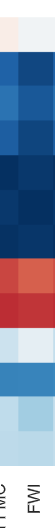

This thing suggest high linear correlation with the input labels-->MULTIPLE LINEAR REGRESSION

<h2>2) More Analysis</h2>

<h3>2.1) Region Wise analysis</h3>

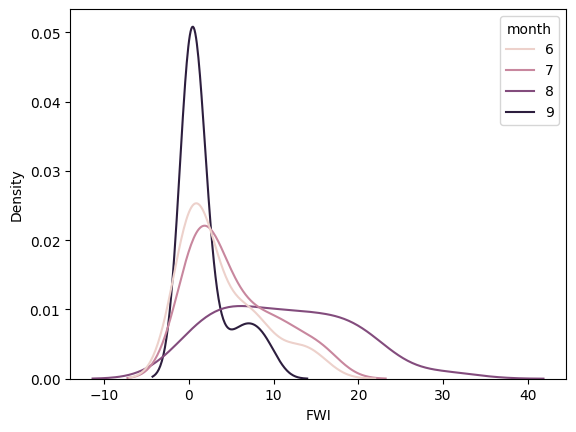

In [25]:
# 1-D array to kde ['FWI']
sns.kdeplot(x=df[df['Region'] == 0]['FWI'],hue=df[df['Region'] == 0]['month'])
plt.show()

Inference: August has most Fires

2.2)Monthly Analysis


<Axes: xlabel='month', ylabel='Temperature'>

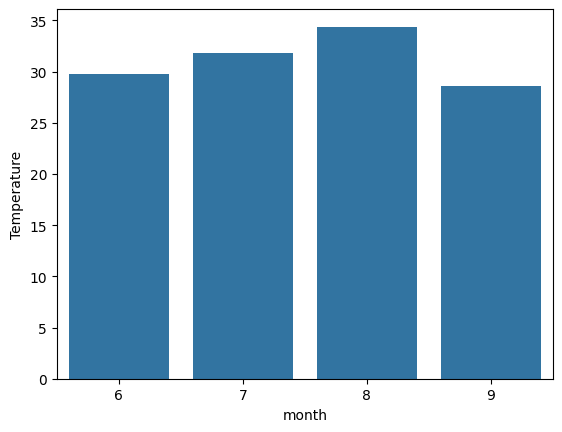

In [28]:
sns.barplot(df[df['Region']==0].groupby('month').mean()['Temperature'])

<Axes: xlabel='month', ylabel='Temperature'>

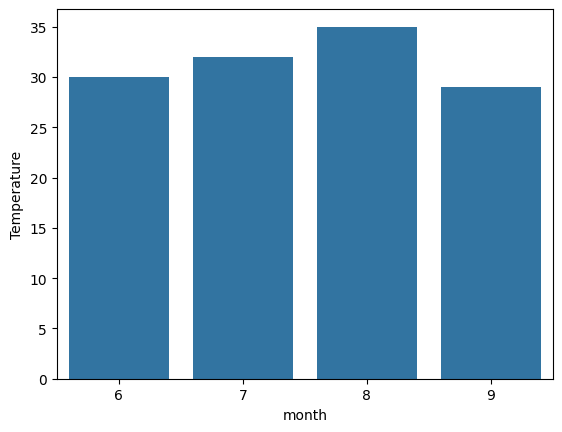

In [29]:
sns.barplot(df[df['Region']==0].groupby('month').median()['Temperature'])

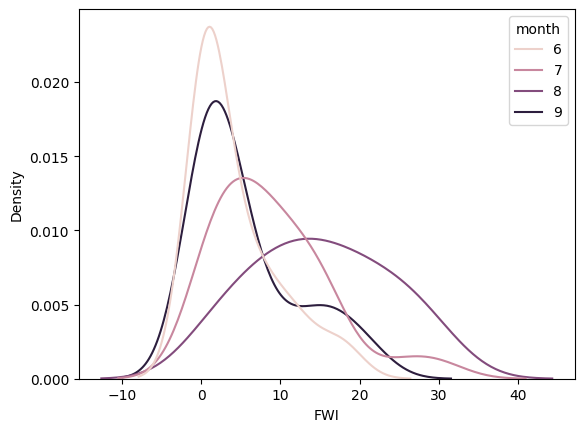

In [33]:
# 1-D array to kde ['FWI']
sns.kdeplot(x=df[df['Region'] == 1]['FWI'],hue=df[df['Region'] == 1]['month'])
plt.show()

<Axes: xlabel='month', ylabel='Temperature'>

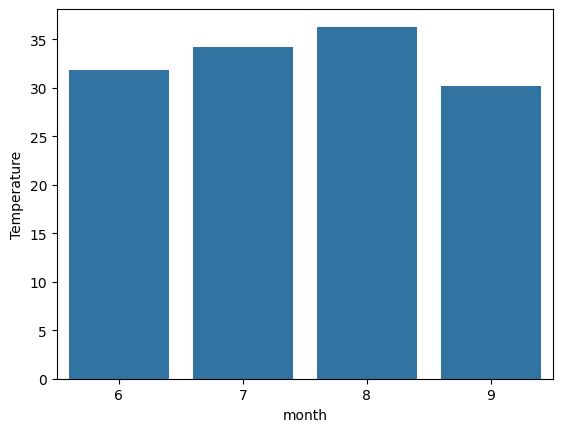

In [34]:
sns.barplot(df[df['Region']==1].groupby('month').mean()['Temperature'])

<Axes: xlabel='month', ylabel='Temperature'>

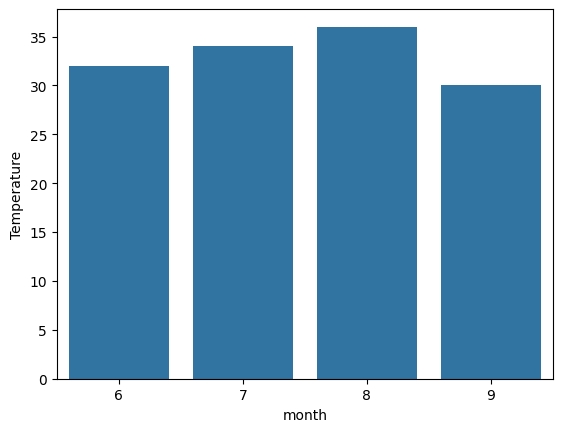

In [35]:
sns.barplot(df[df['Region']==1].groupby('month').median()['Temperature'])

2.3)Yearly FWI change

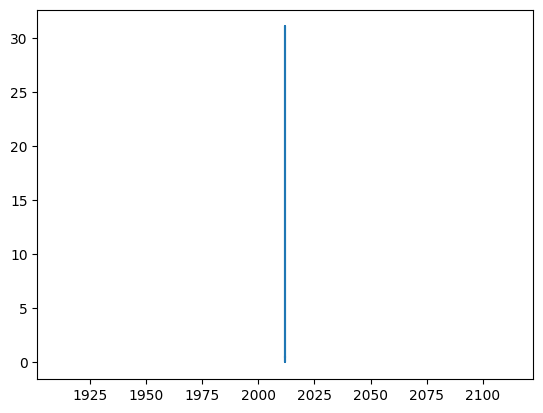

In [39]:
plt.plot(df['year'],df['FWI'])

Inference: Year is constant-->Remove Year

In [41]:
df.drop(columns=['year'],inplace=True)

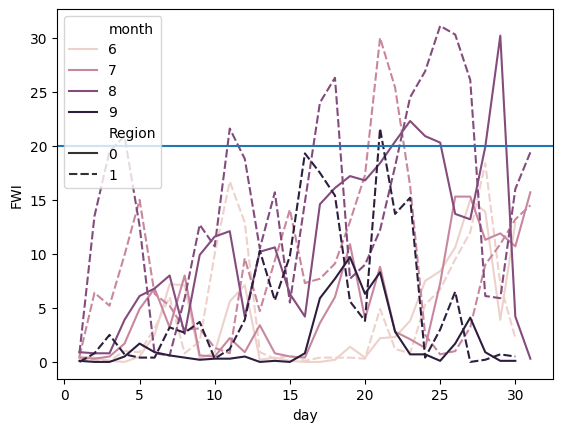

In [48]:
sns.lineplot(x=df['day'],y=df['FWI'],hue=df['month'],style=df['Region'])
plt.axhline(y=20)

Inference--> Region 1 is more prone to fire

In [59]:
for col in df.columns:
    df.rename(columns={col:col.strip()},inplace=True)

In [60]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Region'],
      dtype='object')

<Axes: xlabel='Rain', ylabel='Count'>

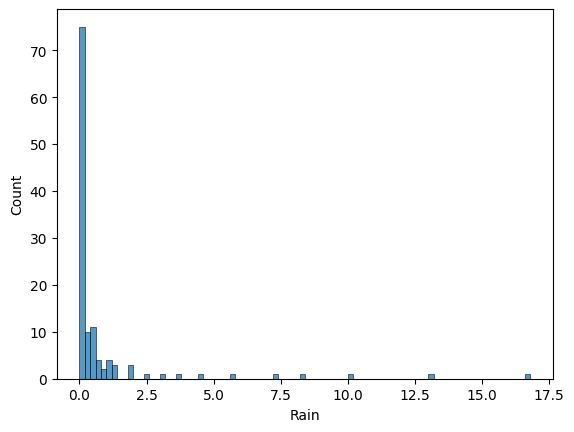

In [64]:
sns.histplot(df[df['Region']==0]['Rain'])

<Axes: xlabel='Rain', ylabel='Count'>

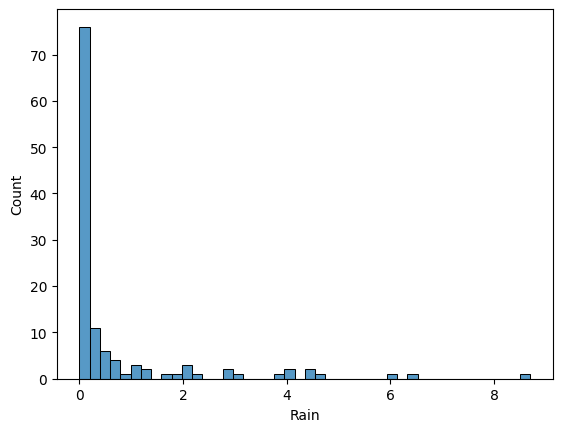

In [65]:
sns.histplot(df[df['Region']==1]['Rain'])


3)Feature Selection

In [ ]:
n=df.shape[1]
n

13

In [67]:
threshold=0.8
cols=df.columns
dropped=set()
for i in range(n):
    for j in range(i):
        if df[cols[i]].corr(df[cols[j]])>threshold and cols[j] not in dropped:
            dropped.add(cols[i])

print(dropped)

{'BUI', 'FWI', 'DC'}


In [68]:
dropped.remove('FWI')

In [69]:
dropped

{'BUI', 'DC'}

In [70]:
df.drop(columns=list(dropped),axis=1,inplace=True)

In [71]:
df.shape

(243, 11)

In [72]:
df.reset_index()

,index,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Region
0,0,1,6,29,57,18,0.0,65.7,3.4,1.3,0.5,0
1,1,2,6,29,61,13,1.3,64.4,4.1,1.0,0.4,0
2,2,3,6,26,82,22,13.1,47.1,2.5,0.3,0.1,0
3,3,4,6,25,89,13,2.5,28.6,1.3,0.0,0.0,0
4,4,5,6,27,77,16,0.0,64.8,3.0,1.2,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,238,26,9,30,65,14,0.0,85.4,16.0,4.5,6.5,1
239,239,27,9,28,87,15,4.4,41.1,6.5,0.1,0.0,1
240,240,28,9,27,87,29,0.5,45.9,3.5,0.4,0.2,1
241,241,29,9,24,54,18,0.1,79.7,4.3,1.7,0.7,1


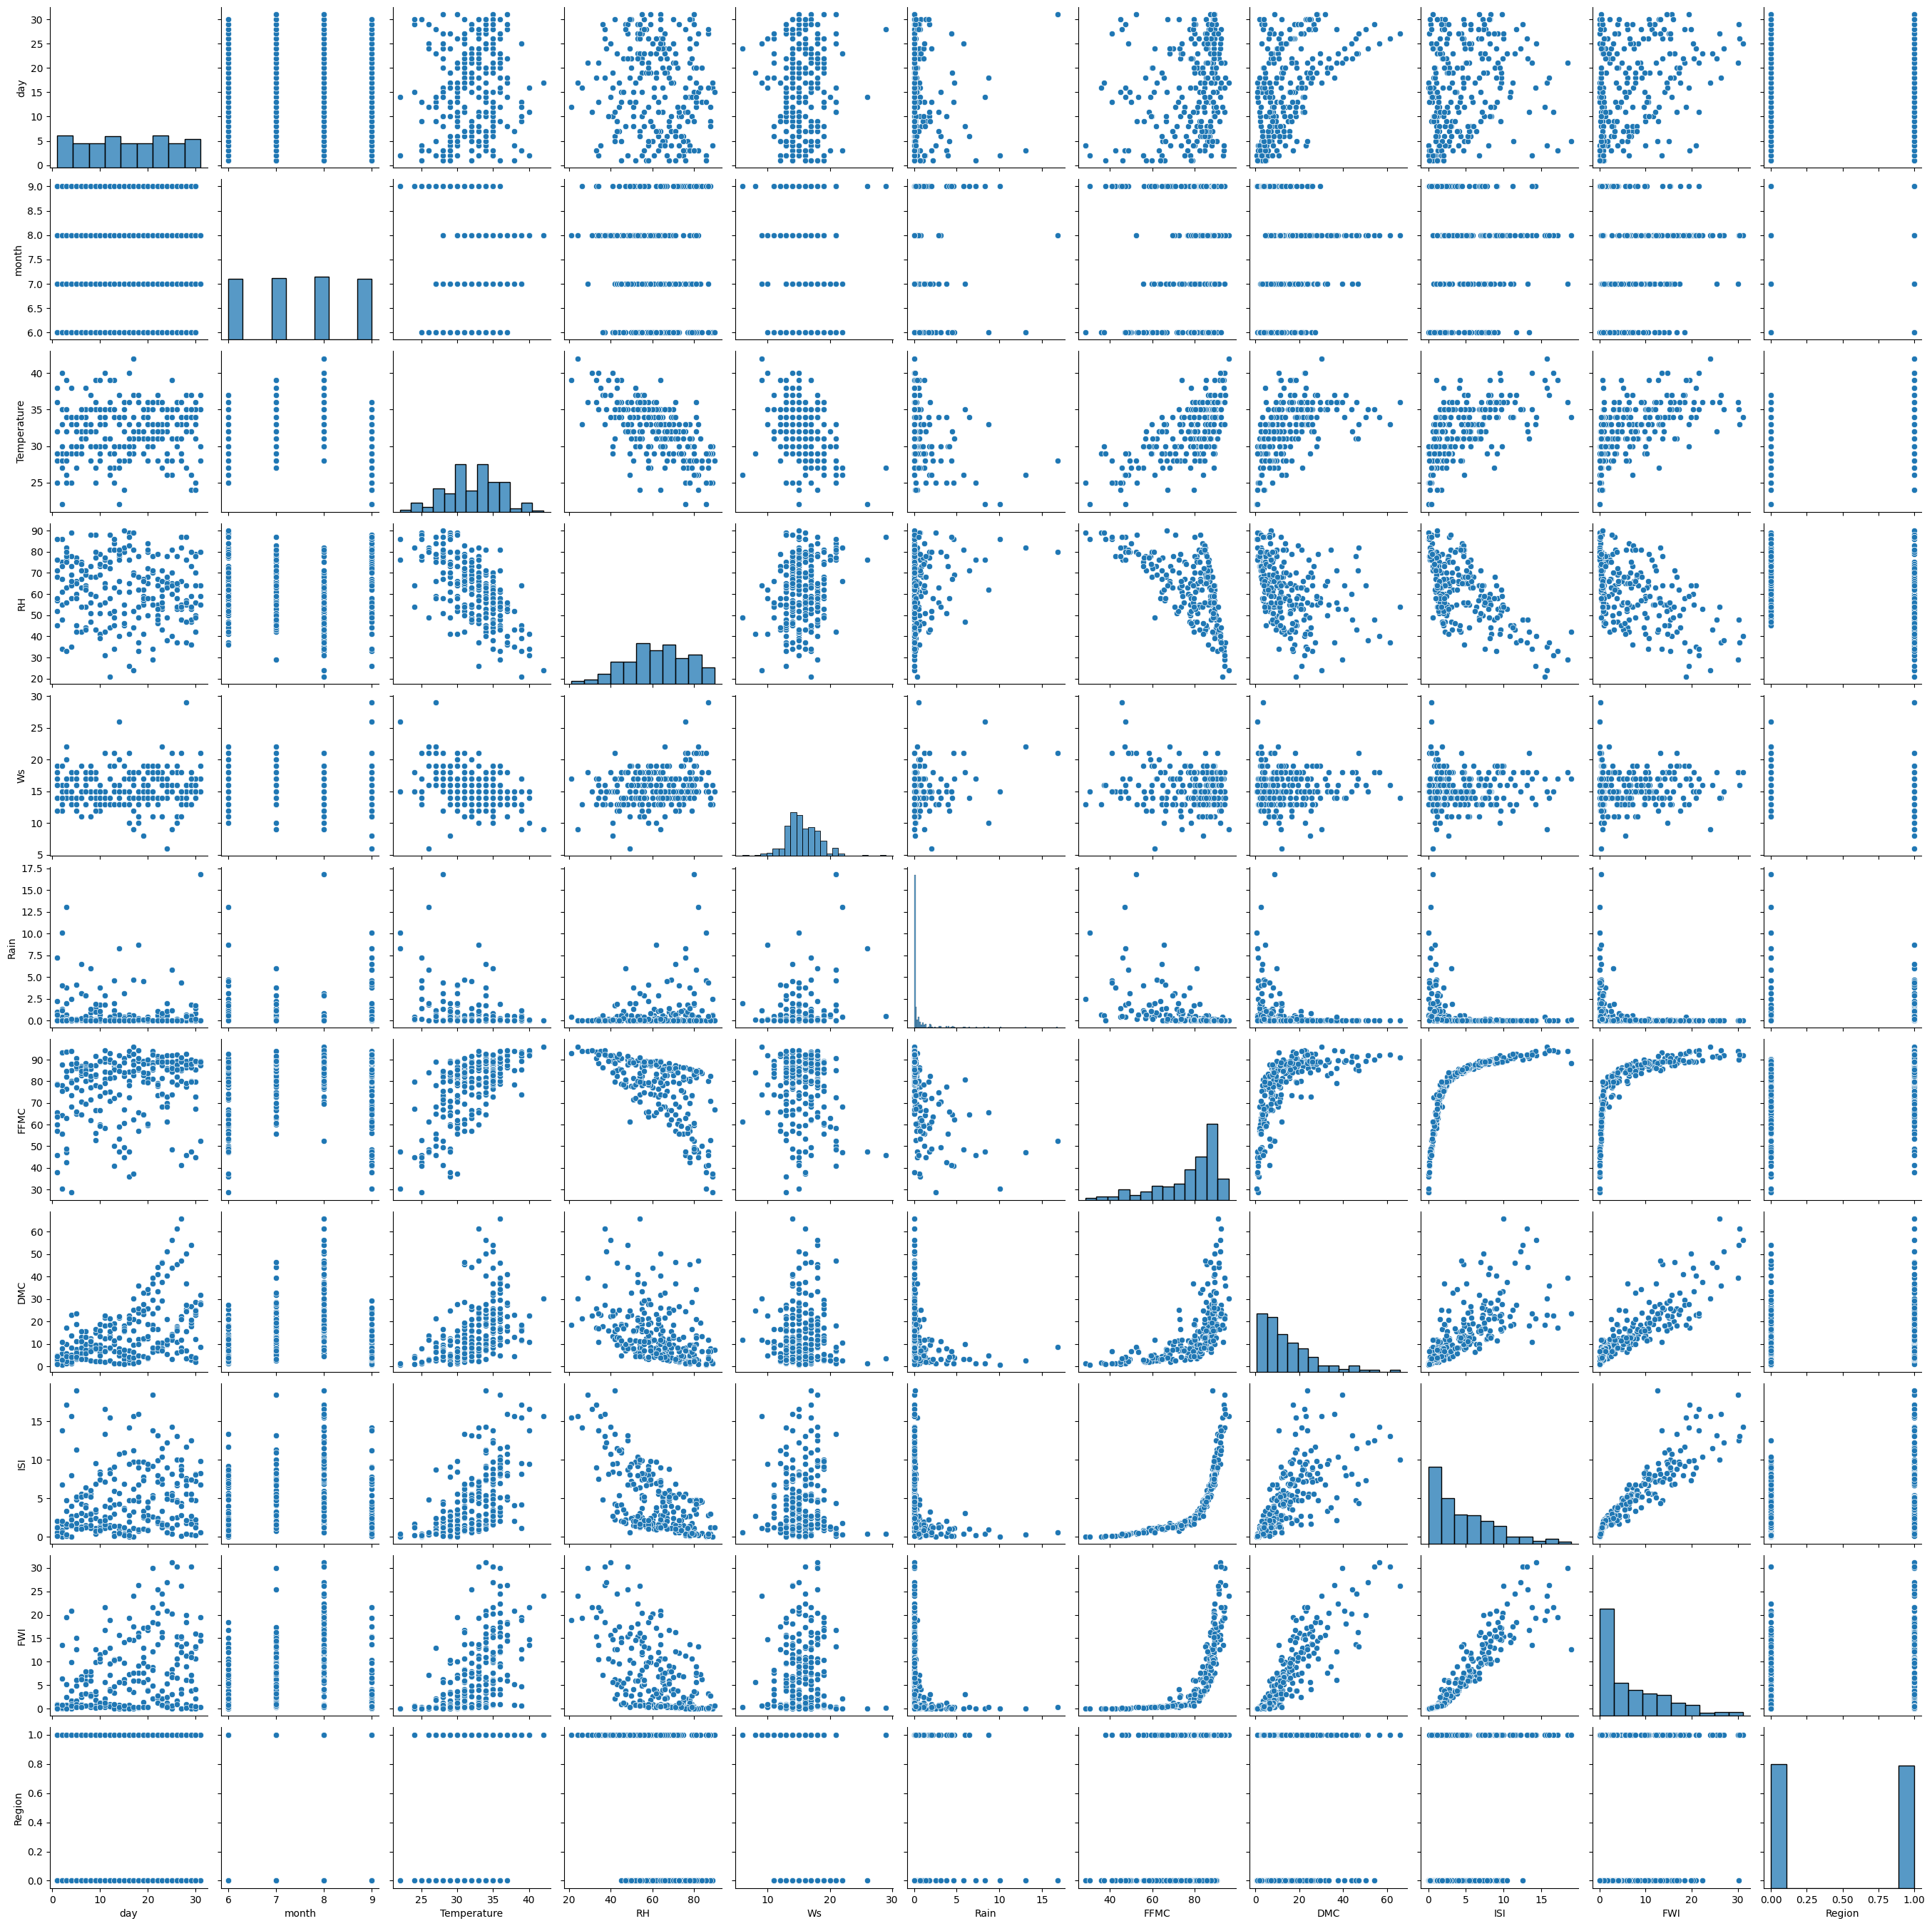

In [77]:
sns.pairplot(df)

<Axes: >

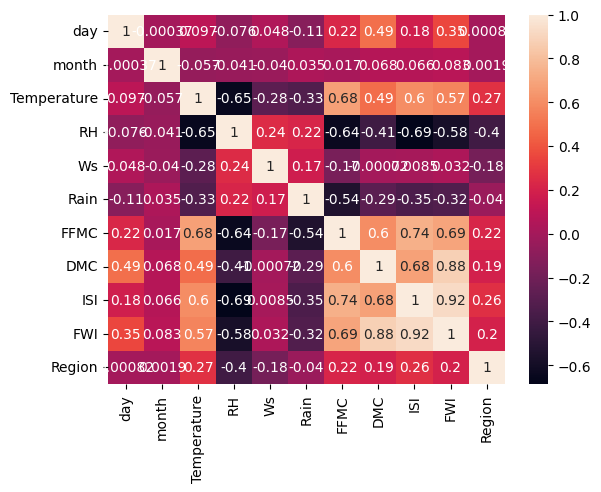

In [79]:
sns.heatmap(df.corr(),annot=True)

In [75]:
df.to_csv('final.csv',index=False)